In [23]:
import pandas as pd
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

suicide_risk = pd.read_csv("foreveralone.csv")

In [24]:
columns_to_drop = ['time', 'prostitution_legal', 'pay_for_sex', 'job_title', 'edu_level']
suicide_risk.drop(columns_to_drop, axis=1, inplace = True)
suicide_risk.head(1)

,gender,sexuallity,age,income,race,bodyweight,virgin,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,improve_yourself_how
0,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,None


In [25]:
suicide_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 469 non-null    object 
 1   sexuallity             469 non-null    object 
 2   age                    469 non-null    int64  
 3   income                 469 non-null    object 
 4   race                   469 non-null    object 
 5   bodyweight             469 non-null    object 
 6   virgin                 469 non-null    object 
 7   friends                469 non-null    float64
 8   social_fear            469 non-null    object 
 9   depressed              469 non-null    object 
 10  what_help_from_others  469 non-null    object 
 11  attempt_suicide        469 non-null    object 
 12  employment             469 non-null    object 
 13  improve_yourself_how   469 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 51.4+ KB

In [26]:
suicide_risk.isna().sum()

gender                   0
sexuallity               0
age                      0
income                   0
race                     0
bodyweight               0
virgin                   0
friends                  0
social_fear              0
depressed                0
what_help_from_others    0
attempt_suicide          0
employment               0
improve_yourself_how     0
dtype: int64

In [28]:
suicide_risk = suicide_risk.dropna()
suicide_risk.isna().sum()

gender                   0
sexuallity               0
age                      0
income                   0
race                     0
bodyweight               0
virgin                   0
friends                  0
social_fear              0
depressed                0
what_help_from_others    0
attempt_suicide          0
employment               0
improve_yourself_how     0
dtype: int64

In [29]:
suicide_risk_numeric = suicide_risk.select_dtypes(exclude=np.number).columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in suicide_risk_numeric:
    suicide_risk[i] = label_encoder.fit_transform(suicide_risk[i])
print("Encoded data")
suicide_risk.head()

Encoded data


,gender,sexuallity,age,income,race,bodyweight,virgin,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,improve_yourself_how
0,1,2,35,9,18,0,1,0.0,1,1,37,1,2,33
1,1,0,21,1,18,3,1,0.0,1,1,41,0,4,58
2,1,2,22,0,18,2,1,10.0,1,1,5,0,5,36
3,1,2,19,1,18,2,1,8.0,1,1,26,0,1,15
4,1,2,23,9,18,2,0,10.0,0,1,5,0,2,33


In [30]:
suicide_risk["attempt_suicide"].value_counts()

0    384
1     85
Name: attempt_suicide, dtype: int64

In [31]:
dummies = pd.get_dummies(suicide_risk["attempt_suicide"])
dummies.head()

,0,1
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [32]:
suicide_risk["outcome"] = dummies[1]
suicide_risk.head()

,gender,sexuallity,age,income,race,bodyweight,virgin,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,improve_yourself_how,outcome
0,1,2,35,9,18,0,1,0.0,1,1,37,1,2,33,1
1,1,0,21,1,18,3,1,0.0,1,1,41,0,4,58,0
2,1,2,22,0,18,2,1,10.0,1,1,5,0,5,36,0
3,1,2,19,1,18,2,1,8.0,1,1,26,0,1,15,0
4,1,2,23,9,18,2,0,10.0,0,1,5,0,2,33,0


In [33]:
target = suicide_risk["attempt_suicide"]
input_columns= suicide_risk.loc[:, suicide_risk.columns!= "attempt_suicide"]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

In [35]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((375, 14), (94, 14), (375,), (94,))

In [36]:
print(y_train, y_test)

453    0
67     0
368    1
291    0
376    0
      ..
204    0
232    0
153    0
230    0
109    0
Name: attempt_suicide, Length: 375, dtype: int64 420    0
117    0
328    0
373    0
305    0
      ..
290    0
416    0
28     0
177    0
257    0
Name: attempt_suicide, Length: 94, dtype: int64


In [37]:
k = 7
suicide_KNN_model = KNN(n_neighbors=k)
suicide_risk.head()

,gender,sexuallity,age,income,race,bodyweight,virgin,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,improve_yourself_how,outcome
0,1,2,35,9,18,0,1,0.0,1,1,37,1,2,33,1
1,1,0,21,1,18,3,1,0.0,1,1,41,0,4,58,0
2,1,2,22,0,18,2,1,10.0,1,1,5,0,5,36,0
3,1,2,19,1,18,2,1,8.0,1,1,26,0,1,15,0
4,1,2,23,9,18,2,0,10.0,0,1,5,0,2,33,0


In [38]:
suicide_KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [39]:
y_predict = suicide_KNN_model.predict(x_test)

In [41]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [42]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [50]:
total_squared_error = (np.sum((y_test - y_predict)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

0.23404255319148937


<AxesSubplot:>

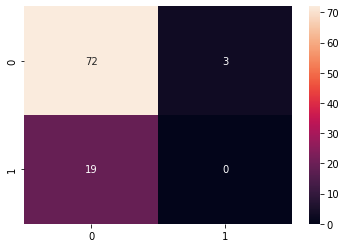

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='g')

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        75
           1       0.00      0.00      0.00        19

    accuracy                           0.77        94
   macro avg       0.40      0.48      0.43        94
weighted avg       0.63      0.77      0.69        94

